# Import csv function

In [142]:
def python_csv(csv_file):
    import csv

    t = [] # column 0
    data1 = [] # column 1
    with open(csv_file) as f:
        reader = csv.reader(f)
        for row in reader:
            # read the rows 1 one by one
            data1.append(float(row[0])) # leftmost column
            t.append(float(row[1])) # second column
    return t, data1;

### Calculate sample rate function

In [143]:
def calculate_sample_rate(time): # Time is output t from python_csv()
    #sample rate = number of data points / total time of samples
    sample_rate = len(time) / (time[-1] - time[0])
    return sample_rate

In [358]:
calculate_sample_rate(python_csv('sigA.csv')[1])

10000.20000400008

In [361]:
calculate_sample_rate(python_csv('sigB.csv')[1])

3300.2000121219467

In [362]:
calculate_sample_rate(python_csv('sigC.csv')[1])

2500.1250062503127

In [363]:
calculate_sample_rate(python_csv('sigD.csv')[1])

400.0833506980621

# 4. FFT function

In [144]:
def FFT2(s,t): # s = data list, t = time list
    import matplotlib.pyplot as plt
    import numpy as np

    Fs = calculate_sample_rate(t) # sample rate
    y = s # the data to make the fft from
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range
    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]

    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(t,y,'b')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    ax2.loglog(frq,abs(Y),'b') # plotting the fft
    ax2.set_xlabel('Freq (Hz)')
    ax2.set_ylabel('|Y(freq)|')
    plt.show()

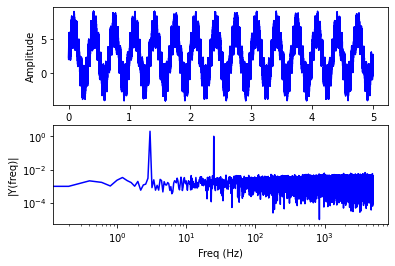

In [175]:
# CSV A
s,t = python_csv('sigA.csv')
FFT2(s,t)

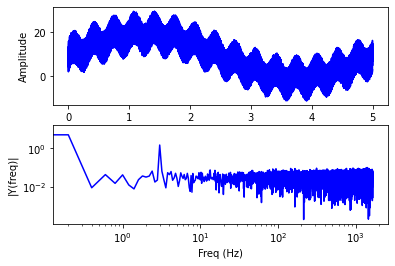

In [157]:
# CSV B
s,t = python_csv('sigB.csv')
FFT2(s,t)

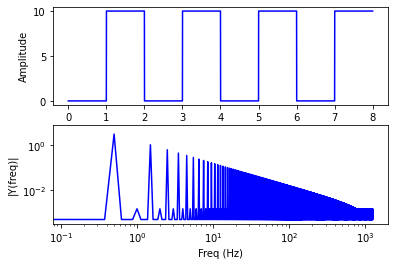

In [158]:
# CSV C
s,t = python_csv('sigC.csv')
FFT2(s,t)

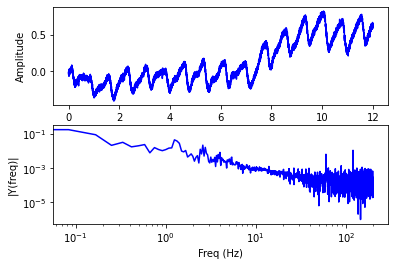

In [159]:
# CSV D
s,t = python_csv('sigD.csv')
FFT2(s,t)

# 5. Moving average filter

In [165]:
def MAV(data, time, x):
    import numpy as np
    
    data_length = len(data)
    data = (x * [0]) + data # Set first x values to 0
    for i in range(data_length):
        data[i] = sum(data[i:(i+x)])
    data_new = np.array(data) / x
    data_new = data_new.tolist()
    return data_new[x-1:-1], time

In [232]:
def p5(csv_file,x):
    import matplotlib.pyplot as plt
    import numpy as np
    
    s,t = python_csv(csv_file)
    sa,ta = MAV(s,t,x)
    
    # FFT Plot
    Fs = calculate_sample_rate(t) # sample rate
    y = s # the data to make the fft from
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range
    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]

    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(t,y,'k')
    ax1.plot(t,sa,'r')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    ax2.loglog(frq,abs(Y),'k') # plotting the fft
    
    y = sa # the data to make the fft from
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range
    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]
    
    ax2.loglog(frq,abs(Y),'r') # plotting the fft
    ax2.set_xlabel('Freq (Hz)')
    ax2.set_ylabel('|Y(freq)|')
    plt.suptitle(csv_file + ', ' + str(x) + ' points averaged')
    plt.show()

### Function to create plots for problem 5

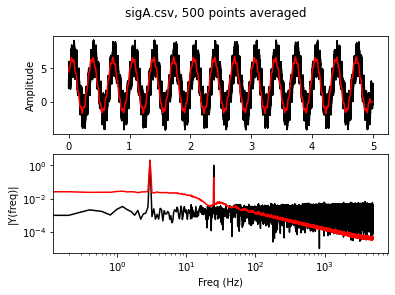

In [259]:
p5('sigA.csv',500)

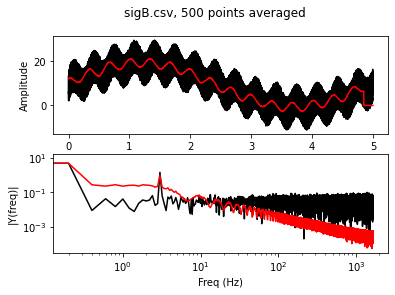

In [260]:
p5('sigB.csv',500)

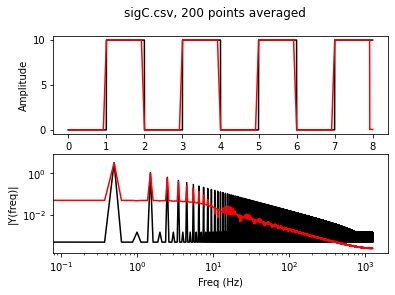

In [294]:
p5('sigC.csv',200)

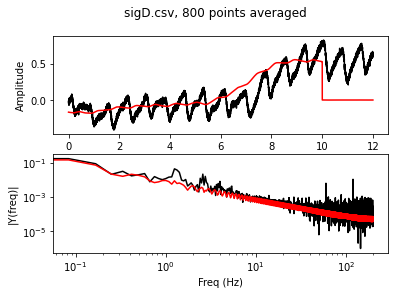

In [292]:
p5('sigD.csv',800)

# 6. IIR Filter

In [303]:
def IIR(data, time, A, B):
    import numpy as np
    
    data_length = len(data)
    data_new = [0] * data_length
    for i in range(1,data_length):
        data_new[i] = A * data[i-1] + B * data[i]
    return data_new, time

In [313]:
def p6(csv_file,A,B):
    import matplotlib.pyplot as plt
    import numpy as np
    
    s,t = python_csv(csv_file)
    sa,ta = IIR(s,t,A,B)
    
    # FFT Plot
    Fs = calculate_sample_rate(t) # sample rate
    y = s # the data to make the fft from
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range
    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]

    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(t,y,'k')
    ax1.plot(t,sa,'r')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    ax2.loglog(frq,abs(Y),'k') # plotting the fft
    
    y = sa # the data to make the fft from
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range
    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]
    
    ax2.loglog(frq,abs(Y),'r') # plotting the fft
    ax2.set_xlabel('Freq (Hz)')
    ax2.set_ylabel('|Y(freq)|')
    plt.suptitle(csv_file + ', ' + 'A = ' + str(A) + ', ' + 'B = ' + str(B))
    plt.show()

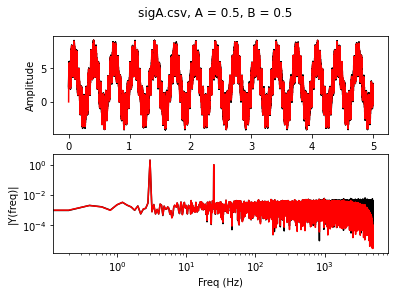

In [319]:
p6('sigA.csv',0.5,0.5)

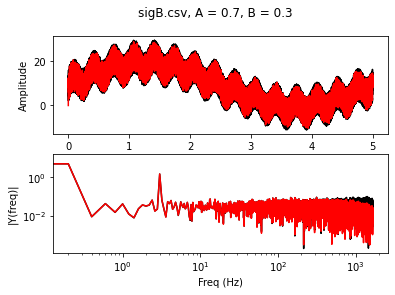

In [329]:
p6('sigB.csv',0.7,0.3)

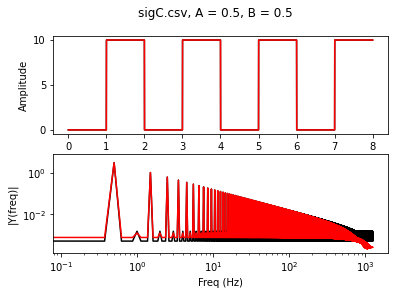

In [333]:
p6('sigC.csv',0.5,0.5)

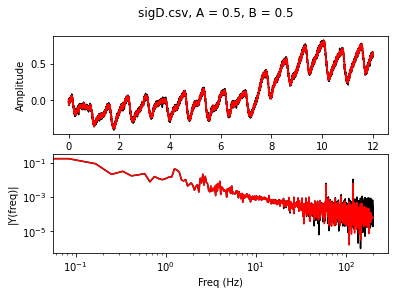

In [337]:
p6('sigD.csv',0.5,0.5)

# 7. FIR Filter

In [377]:
def FIR(data, time, h):
    import numpy as np
    
    data_length = len(data)
    x = len(h)
    data = (x * [0]) + data # Set first x values to 0
    for i in range(data_length):
        for j in range(x):
            data[i] += h[j] * data[i+j]
    data_new = np.array(data)
    data_new = data_new.tolist()
    return data_new[x-1:-1], time

In [378]:
def p7(csv_file,h):
    import matplotlib.pyplot as plt
    import numpy as np
    
    s,t = python_csv(csv_file)
    sa,ta = FIR(s,t,h)
    
    # FFT Plot
    Fs = calculate_sample_rate(t) # sample rate
    y = s # the data to make the fft from
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range
    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]

    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(t,y,'k')
    ax1.plot(t,sa,'r')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    ax2.loglog(frq,abs(Y),'k') # plotting the fft
    
    y = sa # the data to make the fft from
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range
    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]
    
    ax2.loglog(frq,abs(Y),'r') # plotting the fft
    ax2.set_xlabel('Freq (Hz)')
    ax2.set_ylabel('|Y(freq)|')
    plt.suptitle(csv_file + ', ' + 'weights shown in code')
    plt.show()

In [382]:
h_a = [
    0.000000000000000000,
    -0.000005808574635563,
    -0.000049743723609259,
    -0.000093013397707690,
    -0.000000000000000001,
    0.000296790891789754,
    0.000589360721165233,
    0.000427487215311701,
    -0.000465135576162150,
    -0.001661822005903757,
    -0.001992943687534285,
    -0.000391945719442743,
    0.002790046202986978,
    0.005227471292631382,
    0.003908856343528833,
    -0.002078053873879000,
    -0.009417065370407761,
    -0.011645095463143051,
    -0.003936120201181081,
    0.011399359017620573,
    0.023682896399972151,
    0.019902447804684129,
    -0.004486920207322514,
    -0.037599155217253100,
    -0.053634670115478719,
    -0.027112656724521702,
    0.048941006760945517,
    0.153343170915491350,
    0.244069687647286038,
    0.279983137289537387,
    0.244069687647286065,
    0.153343170915491350,
    0.048941006760945517,
    -0.027112656724521698,
    -0.053634670115478712,
    -0.037599155217253120,
    -0.004486920207322516,
    0.019902447804684122,
    0.023682896399972155,
    0.011399359017620580,
    -0.003936120201181083,
    -0.011645095463143058,
    -0.009417065370407761,
    -0.002078053873879002,
    0.003908856343528839,
    0.005227471292631384,
    0.002790046202986982,
    -0.000391945719442743,
    -0.001992943687534285,
    -0.001661822005903757,
    -0.000465135576162150,
    0.000427487215311701,
    0.000589360721165232,
    0.000296790891789754,
    -0.000000000000000001,
    -0.000093013397707690,
    -0.000049743723609259,
    -0.000005808574635563,
    0.000000000000000000,
]

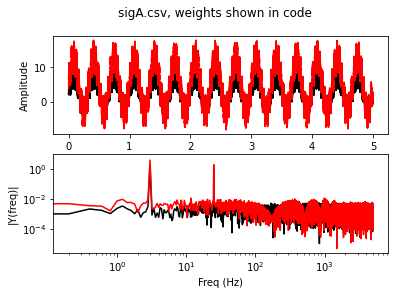

In [383]:
# CSV A
p7('sigA.csv',h_a)

In [384]:
h_b = [
    0.000000000000000000,
    -0.000016817461869098,
    -0.000041826483687530,
    0.000052911264300492,
    0.000312583169239523,
    0.000452184140972260,
    -0.000000000000000001,
    -0.001067909719026748,
    -0.001809550814670827,
    -0.000822697450880302,
    0.002137678239328250,
    0.004870011274428794,
    0.003769244006115367,
    -0.002572442672826673,
    -0.010155915286819240,
    -0.010974888508867891,
    0.000000000000000006,
    0.017364880107313452,
    0.025566712253050173,
    0.010424812183889264,
    -0.025066651678255975,
    -0.054737591234933436,
    -0.042477128339528714,
    0.031061127410725618,
    0.147771500511120618,
    0.255967494614855406,
    0.299984560952054335,
    0.255967494614855406,
    0.147771500511120646,
    0.031061127410725618,
    -0.042477128339528734,
    -0.054737591234933443,
    -0.025066651678255975,
    0.010424812183889264,
    0.025566712253050183,
    0.017364880107313466,
    0.000000000000000006,
    -0.010974888508867893,
    -0.010155915286819250,
    -0.002572442672826673,
    0.003769244006115366,
    0.004870011274428800,
    0.002137678239328250,
    -0.000822697450880304,
    -0.001809550814670833,
    -0.001067909719026749,
    -0.000000000000000001,
    0.000452184140972260,
    0.000312583169239523,
    0.000052911264300492,
    -0.000041826483687530,
    -0.000016817461869097,
    0.000000000000000000,
]

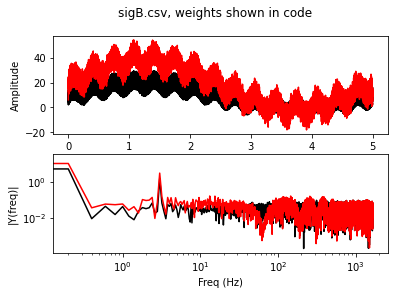

In [385]:
# CSV B
p7('sigB.csv',h_b)

In [386]:
h_c = [
    0.000000000000000000,
    -0.000016817461869098,
    -0.000041826483687530,
    0.000052911264300492,
    0.000312583169239523,
    0.000452184140972260,
    -0.000000000000000001,
    -0.001067909719026748,
    -0.001809550814670827,
    -0.000822697450880302,
    0.002137678239328250,
    0.004870011274428794,
    0.003769244006115367,
    -0.002572442672826673,
    -0.010155915286819240,
    -0.010974888508867891,
    0.000000000000000006,
    0.017364880107313452,
    0.025566712253050173,
    0.010424812183889264,
    -0.025066651678255975,
    -0.054737591234933436,
    -0.042477128339528714,
    0.031061127410725618,
    0.147771500511120618,
    0.255967494614855406,
    0.299984560952054335,
    0.255967494614855406,
    0.147771500511120646,
    0.031061127410725618,
    -0.042477128339528734,
    -0.054737591234933443,
    -0.025066651678255975,
    0.010424812183889264,
    0.025566712253050183,
    0.017364880107313466,
    0.000000000000000006,
    -0.010974888508867893,
    -0.010155915286819250,
    -0.002572442672826673,
    0.003769244006115366,
    0.004870011274428800,
    0.002137678239328250,
    -0.000822697450880304,
    -0.001809550814670833,
    -0.001067909719026749,
    -0.000000000000000001,
    0.000452184140972260,
    0.000312583169239523,
    0.000052911264300492,
    -0.000041826483687530,
    -0.000016817461869097,
    0.000000000000000000,
]

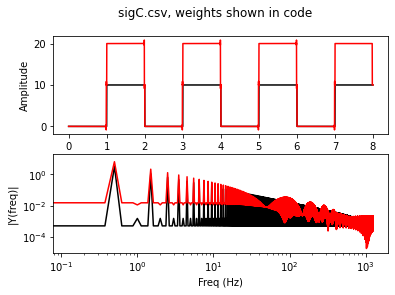

In [387]:
# CSV C
p7('sigC.csv',h_c)

In [388]:
h_d = [
    0.000000000000000000,
    -0.000016817461869098,
    -0.000041826483687530,
    0.000052911264300492,
    0.000312583169239523,
    0.000452184140972260,
    -0.000000000000000001,
    -0.001067909719026748,
    -0.001809550814670827,
    -0.000822697450880302,
    0.002137678239328250,
    0.004870011274428794,
    0.003769244006115367,
    -0.002572442672826673,
    -0.010155915286819240,
    -0.010974888508867891,
    0.000000000000000006,
    0.017364880107313452,
    0.025566712253050173,
    0.010424812183889264,
    -0.025066651678255975,
    -0.054737591234933436,
    -0.042477128339528714,
    0.031061127410725618,
    0.147771500511120618,
    0.255967494614855406,
    0.299984560952054335,
    0.255967494614855406,
    0.147771500511120646,
    0.031061127410725618,
    -0.042477128339528734,
    -0.054737591234933443,
    -0.025066651678255975,
    0.010424812183889264,
    0.025566712253050183,
    0.017364880107313466,
    0.000000000000000006,
    -0.010974888508867893,
    -0.010155915286819250,
    -0.002572442672826673,
    0.003769244006115366,
    0.004870011274428800,
    0.002137678239328250,
    -0.000822697450880304,
    -0.001809550814670833,
    -0.001067909719026749,
    -0.000000000000000001,
    0.000452184140972260,
    0.000312583169239523,
    0.000052911264300492,
    -0.000041826483687530,
    -0.000016817461869097,
    0.000000000000000000,
]

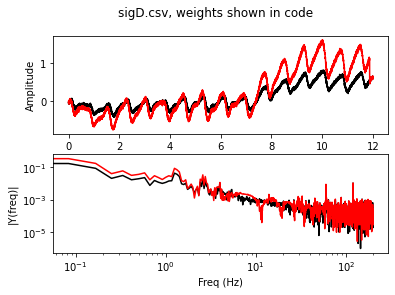

In [389]:
# CSV D
p7('sigD.csv',h_d)